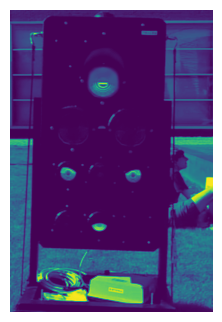

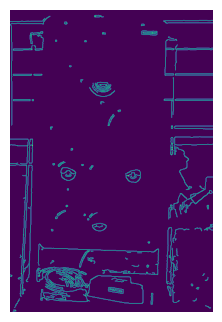

((9.799178123474121, 713.43798828125), (4.489086151123047, 7.213761329650879), 83.44074249267578)
((468.29864501953125, 704.5989990234375), (2.2826662063598633, 13.77982234954834), 112.5440444946289)
((15.992725372314453, 696.177001953125), (1.7165719270706177, 23.790199279785156), 29.06268882751465)
((444.1181335449219, 696.8465576171875), (12.776595115661621, 19.66660499572754), 0.0)
((79.19767761230469, 665.4826049804688), (18.233449935913086, 112.05179595947266), 111.09620666503906)
((94.18728637695312, 681.4907836914062), (2.0357506275177, 17.523130416870117), 97.28900909423828)
((117.81155395507812, 687.77294921875), (6.7172770500183105, 24.878767013549805), 44.43091583251953)
((100.42015838623047, 678.479248046875), (1.790544033050537, 8.208805084228516), 108.4898910522461)
((335.295166015625, 684.1130981445312), (4.568448543548584, 31.721738815307617), 2.7850048542022705)
((335.3081359863281, 684.4517211914062), (4.885775566101074, 27.6600399017334), 3.5120744705200195)
((60.13

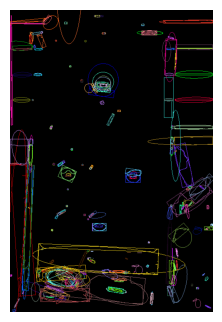

In [2]:
import cv2 as cv
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

def thresh_callback(val):
    threshold = val
    
    plt.axis('off')
    plt.imshow(src_gray)
    plt.show()
    
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    
    plt.axis('off')
    plt.imshow(canny_output)
    plt.show()
    
    contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)
    # Draw contours + rotated rects + ellipses
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    for i, c in enumerate(contours):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            print(minEllipse[i])
            cv.ellipse(drawing, minEllipse[i], color, 1)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)
    
    plt.axis('off')
    plt.imshow(drawing)
    plt.show()

    
src = cv.imread(cv.samples.findFile("data/drohne-signals/traffic_light0026.png"))
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
thresh = 100 # initial threshold
thresh_callback(thresh)
